In [1]:
import pandas as pd 
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import seaborn as sns

from dateutil.parser import parse
from datetime import datetime


In [139]:

filePath ="C:/Users/Impact2/OneDrive/Documents/PythonWorkspace/"
# fileName="activity.csv"
fileName="crime_data_Proj1.csv"


data = pd.read_csv(filePath+fileName)


# data=pd.read_csv('C:/Users/AQ/Documents/my workspace/crime_data_Proj1.csv')
data.head(7)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"
5,5,1699235,G498287,08/21/2001 12:00:00 AM,003XX W 28 PL,0810,THEFT,OVER $500,STREET,False,...,NaN,NaN,06,1174343.0,1885951.0,2001,08/17/2015 03:03:40 PM,41.842450,-87.635701,"(41.842450075, -87.635700695)"
6,6,5061155,HM660983,10/14/2006 10:00:00 PM,006XX S CENTRAL AVE,0320,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,...,29.0,25.0,03,1139154.0,1896536.0,2006,02/28/2018 03:56:25 PM,41.872209,-87.764579,"(41.872208575, -87.764578577)"


In [140]:
#movin the 'primary Type'to the end of of the label 
data=pd.DataFrame(data, columns=['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
      'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat',  'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location','District', 'Primary Type'])
data.head(7)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,District,Primary Type
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,TO VEHICLE,STREET,False,False,...,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)",4.0,CRIMINAL DAMAGE
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,...,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)",4.0,WEAPONS VIOLATION
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,FORCIBLE ENTRY,RESIDENCE,True,False,...,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)",17.0,BURGLARY
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)",11.0,ASSAULT
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)",12.0,ASSAULT
5,5,1699235,G498287,08/21/2001 12:00:00 AM,003XX W 28 PL,0810,OVER $500,STREET,False,False,...,06,1174343.0,1885951.0,2001,08/17/2015 03:03:40 PM,41.842450,-87.635701,"(41.842450075, -87.635700695)",2.0,THEFT
6,6,5061155,HM660983,10/14/2006 10:00:00 PM,006XX S CENTRAL AVE,0320,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,...,03,1139154.0,1896536.0,2006,02/28/2018 03:56:25 PM,41.872209,-87.764579,"(41.872208575, -87.764578577)",15.0,ROBBERY


In [141]:
data.tail(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,District,Primary Type
2278716,2278716,6944094,HR349535,05/30/2009 05:00:00 PM,089XX S COMMERCIAL AVE,0810,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,False,...,06,1197693.0,1846366.0,2009,02/28/2018 03:56:25 PM,41.733274,-87.551336,"(41.73327429, -87.55133578)",4.0,THEFT
2278717,2278717,10849223,JA153322,02/06/2017 08:00:00 PM,012XX E 72ND PL,0910,AUTOMOBILE,VEHICLE NON-COMMERCIAL,False,False,...,07,1185692.0,1857187.0,2017,02/16/2017 03:47:17 PM,41.763259,-87.594960,"(41.763259007, -87.594960398)",3.0,MOTOR VEHICLE THEFT
2278718,2278718,4708691,HM308975,04/23/2006 11:35:00 PM,059XX S STATE ST,1330,TO LAND,TAVERN/LIQUOR STORE,True,False,...,26,1177289.0,1865734.0,2006,02/28/2018 03:56:25 PM,41.786907,-87.625501,"(41.78690669, -87.625500912)",2.0,CRIMINAL TRESPASS
2278719,2278719,7815862,HS625989,11/21/2010 09:00:00 AM,089XX S BLACKSTONE AVE,1310,TO PROPERTY,RESIDENTIAL YARD (FRONT/BACK),False,False,...,14,1187678.0,1845975.0,2010,02/10/2018 03:50:01 PM,41.732445,-87.588037,"(41.732445186, -87.588037377)",4.0,CRIMINAL DAMAGE
2278720,2278720,6643262,HP714246,12/03/2008 05:30:00 AM,056XX W CORNELIA AVE,0810,OVER $500,VEHICLE NON-COMMERCIAL,False,False,...,06,1138111.0,1922705.0,2008,02/28/2018 03:56:25 PM,41.944038,-87.767774,"(41.944038314, -87.767774454)",16.0,THEFT
2278721,2278721,10716043,HZ474139,10/14/2016 02:35:00 PM,006XX N CLARK ST,0560,SIMPLE,CONVENIENCE STORE,True,False,...,08A,1175423.0,1904617.0,2016,02/10/2018 03:50:01 PM,41.893647,-87.631177,"(41.893646656, -87.631177143)",18.0,ASSAULT
2278722,2278722,1740109,G546340,09/11/2001 10:20:00 PM,052XX W LAKE ST,0460,SIMPLE,RESIDENCE,False,True,...,08B,1141137.0,1902008.0,2001,08/17/2015 03:03:40 PM,41.887188,-87.757163,"(41.887188151, -87.757163155)",15.0,BATTERY
2278723,2278723,4737434,HM342705,05/10/2006 07:49:00 PM,007XX E OAKWOOD BLVD,0560,SIMPLE,APARTMENT,False,True,...,08A,1181989.0,1878827.0,2006,02/28/2018 03:56:25 PM,41.822727,-87.607863,"(41.82272748, -87.607863136)",2.0,ASSAULT
2278724,2278724,11122832,JA476827,10/18/2017 10:30:00 PM,002XX W ERIE ST,1360,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,26,1174469.0,1904732.0,2017,02/10/2018 03:50:01 PM,41.893984,-87.634677,"(41.893983593, -87.634677382)",18.0,CRIMINAL TRESPASS
2278725,2278725,3409804,HK420105,06/09/2004 08:19:28 PM,016XX N ROCKWELL ST,1811,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,18,1158782.0,1910845.0,2004,02/28/2018 03:56:25 PM,41.911094,-87.692123,"(41.91109424, -87.692122762)",14.0,NARCOTICS


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  Ward                  float64
 12  Community Area        float64
 13  FBI Code              object 
 14  X Coordinate          float64
 15  Y Coordinate          float64
 16  Year                  int64  
 17  Updated On            object 
 18  Latitude              float64
 19  Longitude             float64
 20  Location              object 
 21  District              float64
 22  Primary Type          object 
dtypes: bool

In [143]:
data.describe()

,Unnamed: 0,ID,Beat,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,District
count,2.278726e+06,2.278726e+06,2.278726e+06,2.094031e+06,2.094459e+06,2.254741e+06,2.254741e+06,2.278726e+06,2.254741e+06,2.254741e+06,2.278714e+06
mean,1.139362e+06,6.882068e+06,1.186442e+03,2.272764e+01,3.752140e+01,1.164569e+06,1.885747e+06,2.009638e+03,4.184209e+01,-8.767161e+01,1.129072e+01
std,6.578117e+05,3.419168e+06,7.026836e+02,1.383464e+01,2.153282e+01,1.673955e+04,3.209855e+04,6.019724e+00,8.830434e-02,6.073538e-02,6.946692e+00
min,0.000000e+00,6.370000e+02,1.110000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01,1.000000e+00
25%,5.696812e+05,3.716076e+06,6.210000e+02,1.000000e+01,2.300000e+01,1.152948e+06,1.859053e+06,2.004000e+03,4.176866e+01,-8.771379e+01,6.000000e+00
50%,1.139362e+06,6.885990e+06,1.034000e+03,2.300000e+01,3.200000e+01,1.166060e+06,1.890673e+06,2.009000e+03,4.185578e+01,-8.766597e+01,1.000000e+01
75%,1.709044e+06,9.887568e+06,1.731000e+03,3.400000e+01,5.700000e+01,1.176365e+06,1.909219e+06,2.014000e+03,4.190668e+01,-8.762823e+01,1.700000e+01
max,2.278725e+06,1.278199e+07,2.535000e+03,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.022000e+03,4.202291e+01,-8.752453e+01,3.100000e+01


In [144]:
data.shape

(2278726, 23)

In [145]:
#the data is large and there is less resources. for the purpose of this project, i will split the data and use one part
#for the project
#Limiting the number of rows to 1250000 
df_Selectedrows=data.iloc[:1_250_000,:]
#inspecting the data
df_Selectedrows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250000 entries, 0 to 1249999
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1250000 non-null  int64  
 1   ID                    1250000 non-null  int64  
 2   Case Number           1250000 non-null  object 
 3   Date                  1250000 non-null  object 
 4   Block                 1250000 non-null  object 
 5   IUCR                  1250000 non-null  object 
 6   Description           1250000 non-null  object 
 7   Location Description  1248377 non-null  object 
 8   Arrest                1250000 non-null  bool   
 9   Domestic              1250000 non-null  bool   
 10  Beat                  1250000 non-null  int64  
 11  Ward                  1148536 non-null  float64
 12  Community Area        1148780 non-null  float64
 13  FBI Code              1250000 non-null  object 
 14  X Coordinate          1236850 non-

In [146]:
df_Selectedrows.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,District,Primary Type
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,TO VEHICLE,STREET,False,False,...,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)",4.0,CRIMINAL DAMAGE
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,...,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)",4.0,WEAPONS VIOLATION
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,FORCIBLE ENTRY,RESIDENCE,True,False,...,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)",17.0,BURGLARY
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)",11.0,ASSAULT
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)",12.0,ASSAULT
5,5,1699235,G498287,08/21/2001 12:00:00 AM,003XX W 28 PL,0810,OVER $500,STREET,False,False,...,06,1174343.0,1885951.0,2001,08/17/2015 03:03:40 PM,41.842450,-87.635701,"(41.842450075, -87.635700695)",2.0,THEFT
6,6,5061155,HM660983,10/14/2006 10:00:00 PM,006XX S CENTRAL AVE,0320,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,...,03,1139154.0,1896536.0,2006,02/28/2018 03:56:25 PM,41.872209,-87.764579,"(41.872208575, -87.764578577)",15.0,ROBBERY
7,7,9876456,HX527438,12/02/2014 11:48:00 AM,043XX W POTOMAC AVE,1811,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,...,18,1147306.0,1908305.0,2014,02/10/2018 03:50:01 PM,41.904352,-87.734347,"(41.904351902, -87.734347128)",25.0,NARCOTICS
8,8,7582927,HS386492,06/30/2010 01:00:00 AM,032XX W PIERCE AVE,0910,AUTOMOBILE,STREET,False,False,...,07,1154458.0,1910116.0,2010,02/10/2018 03:50:01 PM,41.909181,-87.708027,"(41.909181404, -87.708027242)",14.0,MOTOR VEHICLE THEFT
9,9,10566046,HZ313634,06/18/2016 11:15:00 PM,021XX N CALIFORNIA AVE,1811,POSS: CANNABIS 30GMS OR LESS,POLICE FACILITY/VEH PARKING LOT,True,False,...,18,1157345.0,1914452.0,2016,02/10/2018 03:50:01 PM,41.921021,-87.697304,"(41.921021491, -87.69730355)",14.0,NARCOTICS


In [147]:
df_Selectedrows.columns.tolist()

['Unnamed: 0',
 'ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location',
 'District',
 'Primary Type']

In [148]:
#Dropping some features by inspection and and signficance to effect to the outcome variable
#we are predicting crimes by type. Some features will not be necessary.we have longitude and latitde, also location. I will be
#dropping them. Having accurate prediction is key at this stage, i will be dropping the Beat feature since it represent 
#the exact location crime happened. Case number, id and the unnamed:0 features are also not necessary
#dropping features not necessary
crimedata_Df=df_Selectedrows.drop(columns=['Unnamed: 0','ID','Case Number','Community Area','FBI Code','Latitude','Longitude',
                    'Location','Year', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Beat', 'Ward'])
crimedata_Df.head()

,Date,Block,Description,Location Description,Arrest,Domestic,Updated On,District,Primary Type
0,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,TO VEHICLE,STREET,False,False,02/28/2018 03:56:25 PM,4.0,CRIMINAL DAMAGE
1,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,08/07/2018 04:02:59 PM,4.0,WEAPONS VIOLATION
2,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,FORCIBLE ENTRY,RESIDENCE,True,False,02/28/2018 03:56:25 PM,17.0,BURGLARY
3,07/23/2018 08:55:00 AM,0000X N KEELER AVE,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,07/30/2018 03:52:24 PM,11.0,ASSAULT
4,07/11/2021 06:40:00 AM,016XX W HARRISON ST,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,07/18/2021 04:56:02 PM,12.0,ASSAULT


In [149]:
#DATA CLEANING
#Inpecting the output variable entries = inconsistent entries on NON - CRIMINAL:NON-CRIMINAL and CRIM SEXUAL ASSAULT : CRIMINAL SEXUAL ASSAULT

crimedata_Df['Primary Type'].unique()

array(['CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'BURGLARY', 'ASSAULT',
       'THEFT', 'ROBBERY', 'NARCOTICS', 'MOTOR VEHICLE THEFT', 'BATTERY',
       'OTHER OFFENSE', 'PROSTITUTION', 'DECEPTIVE PRACTICE',
       'INTIMIDATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL TRESPASS', 'STALKING', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION', 'SEX OFFENSE', 'CRIM SEXUAL ASSAULT',
       'HOMICIDE', 'LIQUOR LAW VIOLATION', 'CRIMINAL SEXUAL ASSAULT',
       'KIDNAPPING', 'ARSON', 'GAMBLING',
       'CONCEALED CARRY LICENSE VIOLATION', 'PUBLIC INDECENCY',
       'RITUALISM', 'OBSCENITY', 'NON - CRIMINAL',
       'OTHER NARCOTIC VIOLATION', 'HUMAN TRAFFICKING', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [150]:

NonDupData = crimedata_Df['Primary Type'].replace({'NON - CRIMINAL': 'NON-CRIMINAL', 'CRIM SEXUAL ASSAULT': 'CRIMINAL SEXUAL ASSAULT'})

In [151]:
len(NonDupData.unique())
NonDupData.size

1250000

In [152]:
NonDupData = pd.DataFrame(NonDupData, columns= ['Primary Type'])


In [153]:
#Adding the cleaned and replaced inconsistene entries to the orignal dataset
crimedata_Df['Primary Type'] = NonDupData['Primary Type']

In [154]:
crimedata_Df['Primary Type'].unique()

array(['CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'BURGLARY', 'ASSAULT',
       'THEFT', 'ROBBERY', 'NARCOTICS', 'MOTOR VEHICLE THEFT', 'BATTERY',
       'OTHER OFFENSE', 'PROSTITUTION', 'DECEPTIVE PRACTICE',
       'INTIMIDATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL TRESPASS', 'STALKING', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION', 'SEX OFFENSE', 'CRIMINAL SEXUAL ASSAULT',
       'HOMICIDE', 'LIQUOR LAW VIOLATION', 'KIDNAPPING', 'ARSON',
       'GAMBLING', 'CONCEALED CARRY LICENSE VIOLATION',
       'PUBLIC INDECENCY', 'RITUALISM', 'OBSCENITY', 'NON-CRIMINAL',
       'OTHER NARCOTIC VIOLATION', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [156]:
#DATA CLEANING
#Checking for null values
crimedata_Df.isna().sum()

Date                       0
Block                      0
Description                0
Location Description    1623
Arrest                     0
Domestic                   0
Updated On                 0
District                   8
Primary Type               0
month                      0
day                        0
period                     0
dtype: int64

In [155]:
#FEATURE ENGINEERING
#splitting the date into more model friendly labels

tCol = crimedata_Df.Date

List = [(datetime.ctime(parse(x[0:-3])),x[-2:]) for x in tCol]
dayList = []
monthList = []
periodList = []
for row in List:
    day = row[0][0:4]
    month = row[0][4:7]
    if row[1]=='AM':
        period = 'Morning'
    elif row[1] =='PM' and int(row[0][11:13])<4:
        period = 'Afternoon'
    elif row[1] =='PM' and int(row[0][11:13])<6:
        period = 'Evening' 
    elif row[1] =='PM' and int(row[0][11:13])>5:
        period = 'Night'
    else:
        period = 'Unknown'
        
    dayList.append(day)
    monthList.append(month)
    periodList.append(period)
    
print(len(dayList), len(monthList), len(periodList))    

crimedata_Df['month'] = monthList
crimedata_Df['day'] = dayList
crimedata_Df['period']= periodList
crimedata_Df.head()

1250000 1250000 1250000


,Date,Block,Description,Location Description,Arrest,Domestic,Updated On,District,Primary Type,month,day,period
0,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,TO VEHICLE,STREET,False,False,02/28/2018 03:56:25 PM,4.0,CRIMINAL DAMAGE,Jul,Sat,Afternoon
1,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,08/07/2018 04:02:59 PM,4.0,WEAPONS VIOLATION,Jul,Tue,Morning
2,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,FORCIBLE ENTRY,RESIDENCE,True,False,02/28/2018 03:56:25 PM,17.0,BURGLARY,Apr,Fri,Morning
3,07/23/2018 08:55:00 AM,0000X N KEELER AVE,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,07/30/2018 03:52:24 PM,11.0,ASSAULT,Jul,Mon,Morning
4,07/11/2021 06:40:00 AM,016XX W HARRISON ST,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,07/18/2021 04:56:02 PM,12.0,ASSAULT,Jul,Sun,Morning


In [157]:
crimedata_Df.columns

Index(['Date', 'Block', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Updated On', 'District', 'Primary Type', 'month', 'day',
       'period'],
      dtype='object')

In [22]:
#Returning dataframe with newly engineered labls 

crimedata_Df2=pd.DataFrame(crimedata_Df, columns=['Date', 'month', 'day',
       'period','Block', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Updated On', 'District', 'Primary Type'])
crimedata_Df2.head()

,Date,month,day,period,Block,Description,Location Description,Arrest,Domestic,Updated On,District,Primary Type
0,07/26/2008 02:30:00 PM,Jul,Sat,Afternoon,085XX S MUSKEGON AVE,TO VEHICLE,STREET,False,False,02/28/2018 03:56:25 PM,4.0,CRIMINAL DAMAGE
1,07/31/2018 10:57:00 AM,Jul,Tue,Morning,092XX S ELLIS AVE,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,08/07/2018 04:02:59 PM,4.0,WEAPONS VIOLATION
2,04/27/2007 10:30:00 AM,Apr,Fri,Morning,062XX N TRIPP AVE,FORCIBLE ENTRY,RESIDENCE,True,False,02/28/2018 03:56:25 PM,17.0,BURGLARY
3,07/23/2018 08:55:00 AM,Jul,Mon,Morning,0000X N KEELER AVE,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,07/30/2018 03:52:24 PM,11.0,ASSAULT
4,07/11/2021 06:40:00 AM,Jul,Sun,Morning,016XX W HARRISON ST,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,07/18/2021 04:56:02 PM,12.0,ASSAULT


In [23]:
#FEATURE ENGINEERING
#splitting the update on Date column into more model friendly labels


upDtdCol = crimedata_Df2['Updated On']

List = [(datetime.ctime(parse(x[0:-3])),x[-2:]) for x in upDtdCol]
dayList = []
monthList = []
periodList = []
for row in List:
    day = row[0][0:4]
    month = row[0][4:7]
    if row[1]=='AM':
        period = 'Morning'
    elif row[1] =='PM' and int(row[0][11:13])<4:
        period = 'Afternoon'
    elif row[1] =='PM' and int(row[0][11:13])<6:
        period = 'Evening' 
    elif row[1] =='PM' and int(row[0][11:13])>5:
        period = 'Night'
    else:
        period = 'Unknown'
        
    dayList.append(day)
    monthList.append(month)
    periodList.append(period)
    
print(len(dayList), len(monthList), len(periodList))    

crimedata_Df2['update_on_month'] = monthList
crimedata_Df2['updated_on_day'] = dayList
crimedata_Df2['updated_on_period']= periodList
crimedata_Df2.head()

1250000 1250000 1250000


,Date,month,day,period,Block,Description,Location Description,Arrest,Domestic,Updated On,District,Primary Type,update_on_month,updated_on_day,updated_on_period
0,07/26/2008 02:30:00 PM,Jul,Sat,Afternoon,085XX S MUSKEGON AVE,TO VEHICLE,STREET,False,False,02/28/2018 03:56:25 PM,4.0,CRIMINAL DAMAGE,Feb,Wed,Afternoon
1,07/31/2018 10:57:00 AM,Jul,Tue,Morning,092XX S ELLIS AVE,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,08/07/2018 04:02:59 PM,4.0,WEAPONS VIOLATION,Aug,Tue,Evening
2,04/27/2007 10:30:00 AM,Apr,Fri,Morning,062XX N TRIPP AVE,FORCIBLE ENTRY,RESIDENCE,True,False,02/28/2018 03:56:25 PM,17.0,BURGLARY,Feb,Wed,Afternoon
3,07/23/2018 08:55:00 AM,Jul,Mon,Morning,0000X N KEELER AVE,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,07/30/2018 03:52:24 PM,11.0,ASSAULT,Jul,Mon,Afternoon
4,07/11/2021 06:40:00 AM,Jul,Sun,Morning,016XX W HARRISON ST,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,07/18/2021 04:56:02 PM,12.0,ASSAULT,Jul,Sun,Evening


In [24]:
crimedata_Df3=crimedata_Df2.drop(columns=['Date', 'Updated On'])
crimedata_Df3.head()

,month,day,period,Block,Description,Location Description,Arrest,Domestic,District,Primary Type,update_on_month,updated_on_day,updated_on_period
0,Jul,Sat,Afternoon,085XX S MUSKEGON AVE,TO VEHICLE,STREET,False,False,4.0,CRIMINAL DAMAGE,Feb,Wed,Afternoon
1,Jul,Tue,Morning,092XX S ELLIS AVE,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,WEAPONS VIOLATION,Aug,Tue,Evening
2,Apr,Fri,Morning,062XX N TRIPP AVE,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,BURGLARY,Feb,Wed,Afternoon
3,Jul,Mon,Morning,0000X N KEELER AVE,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,ASSAULT,Jul,Mon,Afternoon
4,Jul,Sun,Morning,016XX W HARRISON ST,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,ASSAULT,Jul,Sun,Evening


In [25]:
#Checking for Null values
crimedata_Df3.isna().sum()

month                      0
day                        0
period                     0
Block                      0
Description                0
Location Description    1623
Arrest                     0
Domestic                   0
District                   8
Primary Type               0
update_on_month            0
updated_on_day             0
updated_on_period          0
dtype: int64

In [26]:
#we only have 1623 na in Location Description. Since it is not much compare to the total features in the dataset
#and dropping them will not impact significantly on the outcome, i will drop na.
crimedata_Df3.dropna(inplace= True)

In [27]:
crimedata_Df3.isna().sum()

month                   0
day                     0
period                  0
Block                   0
Description             0
Location Description    0
Arrest                  0
Domestic                0
District                0
Primary Type            0
update_on_month         0
updated_on_day          0
updated_on_period       0
dtype: int64

In [28]:
crimedata_Df3.shape

(1248369, 13)

In [158]:
#getting unique labels in each variables
# for col in crimedata_Df3.columns:
#     print(col," :", len(crimedata_Df3[col].unique()), "labels", crimedata_Df3.dtypes[col])

In [30]:
crimedata_Df3['Primary Type'].value_counts().sort_values(ascending=False)

THEFT                                262965
BATTERY                              229116
CRIMINAL DAMAGE                      142906
NARCOTICS                            122222
ASSAULT                               81166
OTHER OFFENSE                         77723
BURGLARY                              68722
MOTOR VEHICLE THEFT                   58227
DECEPTIVE PRACTICE                    52832
ROBBERY                               46813
CRIMINAL TRESPASS                     34769
WEAPONS VIOLATION                     16566
PROSTITUTION                          11435
OFFENSE INVOLVING CHILDREN             9044
PUBLIC PEACE VIOLATION                 8514
CRIMINAL SEXUAL ASSAULT                5379
SEX OFFENSE                            4837
INTERFERENCE WITH PUBLIC OFFICER       2978
LIQUOR LAW VIOLATION                   2462
GAMBLING                               2424
ARSON                                  2171
HOMICIDE                               1947
KIDNAPPING                      

In [31]:
crimedata_Df3.head()

,month,day,period,Block,Description,Location Description,Arrest,Domestic,District,Primary Type,update_on_month,updated_on_day,updated_on_period
0,Jul,Sat,Afternoon,085XX S MUSKEGON AVE,TO VEHICLE,STREET,False,False,4.0,CRIMINAL DAMAGE,Feb,Wed,Afternoon
1,Jul,Tue,Morning,092XX S ELLIS AVE,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,WEAPONS VIOLATION,Aug,Tue,Evening
2,Apr,Fri,Morning,062XX N TRIPP AVE,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,BURGLARY,Feb,Wed,Afternoon
3,Jul,Mon,Morning,0000X N KEELER AVE,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,ASSAULT,Jul,Mon,Afternoon
4,Jul,Sun,Morning,016XX W HARRISON ST,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,ASSAULT,Jul,Sun,Evening


In [32]:
#FEATURE ENGINEERING 
#Print out unique value for each feature to allow for encoding 

for col in crimedata_Df3.columns:
    print(col," :", crimedata_Df3[col].unique().tolist())

month  : ['Jul', 'Apr', 'Aug', 'Oct', 'Dec', 'Jun', 'Jan', 'Nov', 'Mar', 'Sep', 'May', 'Feb']
day  : ['Sat ', 'Tue ', 'Fri ', 'Mon ', 'Sun ', 'Wed ', 'Thu ']
period  : ['Afternoon', 'Morning', 'Night', 'Evening']
Block  : ['085XX S MUSKEGON AVE', '092XX S ELLIS AVE', '062XX N TRIPP AVE', '0000X N KEELER AVE', '016XX W HARRISON ST', '003XX W 28 PL', '006XX S CENTRAL AVE', '043XX W POTOMAC AVE', '032XX W PIERCE AVE', '021XX N CALIFORNIA AVE', '031XX W WARREN BLVD', '058XX S KEDZIE AVE', '014XX N ELK GROVE AVE', '076XX S HALSTED ST', '042XX S INDIANA AVE', '019XX W MADISON ST', '047XX W FULTON ST', '009XX W GRACE ST', '002XX N LOREL AVE', '023XX S STATE ST', '022XX N NATCHEZ AVE', '133XX S BRANDON AVE', '036XX S LAKE PARK AVE', '003XX S MICHIGAN AVE', '001XX W 72ND ST', '078XX S PHILLIPS AVE', '025XX W BERWYN AVE', '077XX S PEORIA ST', '008XX N MICHIGAN AVE', '0000X W DIVISION ST', '065XX S JUSTINE ST', '065XX S ELLIS AVE', '053XX W BLOOMINGDALE AVE', '011XX S WESTERN AVE', '005XX W DIVIS

Primary Type  : ['CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'BURGLARY', 'ASSAULT', 'THEFT', 'ROBBERY', 'NARCOTICS', 'MOTOR VEHICLE THEFT', 'BATTERY', 'OTHER OFFENSE', 'PROSTITUTION', 'DECEPTIVE PRACTICE', 'INTIMIDATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'CRIMINAL TRESPASS', 'STALKING', 'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION', 'SEX OFFENSE', 'CRIMINAL SEXUAL ASSAULT', 'HOMICIDE', 'LIQUOR LAW VIOLATION', 'KIDNAPPING', 'ARSON', 'GAMBLING', 'CONCEALED CARRY LICENSE VIOLATION', 'PUBLIC INDECENCY', 'RITUALISM', 'OBSCENITY', 'NON-CRIMINAL', 'OTHER NARCOTIC VIOLATION', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)']
update_on_month  : ['Feb', 'Aug', 'Jul', 'Oct', 'May', 'Jan', 'Dec', 'Sep', 'Apr', 'Jun', 'Nov', 'Mar']
updated_on_day  : ['Wed ', 'Tue ', 'Mon ', 'Sun ', 'Sat ', 'Thu ', 'Fri ']
updated_on_period  : ['Afternoon', 'Evening', 'Morning', 'Night']


In [160]:
# crimedata_Df3.columns

In [34]:
months={'Feb':1, 'Aug':7, 'Jul':6, 'Oct':9, 'May':4, 'Jan':0, 'Dec':11, 'Sep':8, 'Apr':3, 'Jun':5, 'Nov':10, 'Mar':2}
day={'Sat ':5, 'Tue ':1, 'Fri ':4, 'Mon ':0, 'Sun ':6, 'Wed ':2, 'Thu ':3}
bols ={'False':0, 'True':1}
period= {'Afternoon':1, 'Evening':2, 'Morning':0, 'Night':3}


In [161]:

CrimeDataCopy=crimedata_Df3.copy()


In [162]:
#FEATURE ENGINEERING
#Defining the dictioary with unorderly labels to aboid model bias with incrementing variable or outliers 

months={'Feb':1, 'Aug':7, 'Jul':6, 'Oct':9, 'May':4, 'Jan':0, 'Dec':11, 'Sep':8, 'Apr':3, 'Jun':5, 'Nov':10, 'Mar':2,
       'Sat ':5, 'Tue ':1, 'Fri ':4, 'Mon ':0, 'Sun ':6, 'Wed ':2, 'Thu ':3,
       'False':0, 'True':1,
       'Afternoon':1, 'Evening':2, 'Morning':0, 'Night':3} 

for col in CrimeDataCopy.columns:
    if CrimeDataCopy.dtypes[col]==float or hihi.dtypes[col]==bool or hihi.dtypes[col]==object:
        CrimeDataCopy[col]=hihi[col].astype(str)
        CrimeDataCopy[col]=hihi[col].replace(months)
CrimeDataCopy.head(30)

,month,day,period,Block,Description,Location Description,Arrest,Domestic,District,Primary Type,update_on_month,updated_on_day,updated_on_period
0,6,5,1,085XX S MUSKEGON AVE,TO VEHICLE,STREET,False,False,4.0,CRIMINAL DAMAGE,1,2,1
1,6,1,0,092XX S ELLIS AVE,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,WEAPONS VIOLATION,7,1,2
2,3,4,0,062XX N TRIPP AVE,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,BURGLARY,1,2,1
3,6,0,0,0000X N KEELER AVE,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,ASSAULT,6,0,1
4,6,6,0,016XX W HARRISON ST,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,ASSAULT,6,6,2
5,7,1,0,003XX W 28 PL,OVER $500,STREET,False,False,2.0,THEFT,7,0,1
6,9,5,3,006XX S CENTRAL AVE,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,15.0,ROBBERY,1,2,1
7,11,1,0,043XX W POTOMAC AVE,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,25.0,NARCOTICS,1,5,1
8,5,2,0,032XX W PIERCE AVE,AUTOMOBILE,STREET,False,False,14.0,MOTOR VEHICLE THEFT,1,5,1
9,5,5,3,021XX N CALIFORNIA AVE,POSS: CANNABIS 30GMS OR LESS,POLICE FACILITY/VEH PARKING LOT,True,False,14.0,NARCOTICS,1,5,1


In [163]:
CrimeDataCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1248369 entries, 0 to 1249999
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   month                 1248369 non-null  int64  
 1   day                   1248369 non-null  int64  
 2   period                1248369 non-null  int64  
 3   Block                 1248369 non-null  object 
 4   Description           1248369 non-null  object 
 5   Location Description  1248369 non-null  object 
 6   Arrest                1248369 non-null  bool   
 7   Domestic              1248369 non-null  bool   
 8   District              1248369 non-null  float64
 9   Primary Type          1248369 non-null  object 
 10  update_on_month       1248369 non-null  int64  
 11  updated_on_day        1248369 non-null  int64  
 12  updated_on_period     1248369 non-null  int64  
dtypes: bool(2), float64(1), int64(6), object(4)
memory usage: 116.7+ MB


In [164]:
CrimeDataCopy['Block'].value_counts().sort_values(ascending=False)

100XX W OHARE ST            2644
001XX N STATE ST            2425
076XX S CICERO AVE          1622
008XX N MICHIGAN AVE        1537
0000X N STATE ST            1462
                            ... 
025XX N LAKE SHORE DR NB       1
131XX S GREENWOOD AV           1
072XX S DAN RYAN EXPY OB       1
041XX N PONTIAC AV             1
009XX N ELSTON AV              1
Name: Block, Length: 49853, dtype: int64

In [39]:
# from sklearn.preprocessing import LabelEncoder
# labelID= LabelEncoder()
# x=hihi['Block']
# labels= labelID.fit_transform(x)
# print(labels)
# print(len(labels))
# xx =pd.DataFrame(labels, columns=['Blocks'])

# xx.head()

In [165]:
# crimedata_Df3['Block'].value_counts().sort_values(ascending=False)
# hihi.Block.value_counts().sort_values(ascending=False)

# (hihi.Block == '100XX W OHARE ST').sum()

In [166]:
NormDf = CrimeDataCopy.copy()

In [167]:
NormDf.columns

Index(['month', 'day', 'period', 'Block', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District',
       'Primary Type', 'update_on_month', 'updated_on_day',
       'updated_on_period'],
      dtype='object')

In [168]:
#FEATURE ENGINEERING 
#Preparing the non numeric feature for encoding

Norm2 = NormDf.loc[:,['Block','Location Description','Description']]

pd.DataFrame(Norm2)

,Block,Location Description,Description
0,085XX S MUSKEGON AVE,STREET,TO VEHICLE
1,092XX S ELLIS AVE,POOL ROOM,UNLAWFUL POSS AMMUNITION
2,062XX N TRIPP AVE,RESIDENCE,FORCIBLE ENTRY
3,0000X N KEELER AVE,NURSING HOME/RETIREMENT HOME,SIMPLE
4,016XX W HARRISON ST,PARKING LOT / GARAGE (NON RESIDENTIAL),AGGRAVATED - HANDGUN
...,...,...,...
1249995,029XX N KEDZIE AVE,VEHICLE NON-COMMERCIAL,TO VEHICLE
1249996,028XX W 85TH ST,RESIDENCE,FORCIBLE ENTRY
1249997,044XX W GRENSHAW ST,STREET,$500 AND UNDER
1249998,093XX S GREEN ST,RESIDENTIAL YARD (FRONT/BACK),DOMESTIC BATTERY SIMPLE


In [169]:
Norm3 = Norm2.copy()
pd.DataFrame(Norm3)

,Block,Location Description,Description
0,085XX S MUSKEGON AVE,STREET,TO VEHICLE
1,092XX S ELLIS AVE,POOL ROOM,UNLAWFUL POSS AMMUNITION
2,062XX N TRIPP AVE,RESIDENCE,FORCIBLE ENTRY
3,0000X N KEELER AVE,NURSING HOME/RETIREMENT HOME,SIMPLE
4,016XX W HARRISON ST,PARKING LOT / GARAGE (NON RESIDENTIAL),AGGRAVATED - HANDGUN
...,...,...,...
1249995,029XX N KEDZIE AVE,VEHICLE NON-COMMERCIAL,TO VEHICLE
1249996,028XX W 85TH ST,RESIDENCE,FORCIBLE ENTRY
1249997,044XX W GRENSHAW ST,STREET,$500 AND UNDER
1249998,093XX S GREEN ST,RESIDENTIAL YARD (FRONT/BACK),DOMESTIC BATTERY SIMPLE


In [227]:
#For loop and Count concatenate encoding
count = 1

for x in Norm3:
    df_frequency = (Norm3[x].value_counts()).to_dict()
    Norm3[x] = Norm3[x].map(df_frequency)

   

Norm3

,Block,Location Description,Description,month,day,period,Arrest,Domestic,District,Primary Type,update_on_month,updated_on_day,updated_on_period
0,5400,323911,69470,116632,178932,189020,917334,1076301,71383,142906,986180,480731,1101135
1,6300,153,273,116632,178339,459983,331035,1076301,71383,16566,102137,24646,88240
2,10176,210619,46278,102547,187554,459983,331035,1076301,36202,68722,986180,480731,1101135
3,6720,2461,146923,116632,176482,459983,917334,1076301,80335,81166,18439,106879,1101135
4,2976,2603,3021,116632,169364,459983,917334,1076301,61208,81166,18439,25549,88240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249995,9918,19877,69470,107291,176482,471963,917334,172068,48850,142906,986180,483541,1101135
1249996,9738,210619,46278,112431,187554,459983,917334,1076301,84169,68722,986180,483541,1101135
1249997,10758,323911,101348,116632,180193,459983,917334,1076301,80335,262965,102137,106879,1101135
1249998,10230,12284,97890,116632,187554,471963,917334,172068,41001,229116,986180,480731,1101135


In [49]:
# import pandas as pd
from sklearn import preprocessing

In [174]:


Norm3.loc[:,['month', 'day', 'period','Arrest', 'Domestic', 'District',
       'Primary Type', 'update_on_month', 'updated_on_day',
       'updated_on_period']] = NormDf.loc[:,['month', 'day', 'period','Arrest', 'Domestic', 'District',
       'Primary Type', 'update_on_month', 'updated_on_day',
       'updated_on_period']]
# Norm3.columns 


In [175]:
# Norm3 = Norm2.copy
# Norm2.loc[:,['month', 'day', 'period', 'Block', 'Description',
#        'Location Description', 'Arrest', 'Domestic', 'District',
#         'update_on_month', 'updated_on_day',
#        'updated_on_period', 'Primary Type']]
Norm3

,Block,Location Description,Description,month,day,period,Arrest,Domestic,District,Primary Type,update_on_month,updated_on_day,updated_on_period
0,90,323911,69470,6,5,1,False,False,4.0,CRIMINAL DAMAGE,1,2,1
1,84,153,273,6,1,0,True,False,4.0,WEAPONS VIOLATION,7,1,2
2,6,210619,46278,3,4,0,True,False,17.0,BURGLARY,1,2,1
3,70,2461,146923,6,0,0,False,False,11.0,ASSAULT,6,0,1
4,124,2603,3021,6,6,0,False,False,12.0,ASSAULT,6,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249995,38,19877,69470,9,0,3,False,True,14.0,CRIMINAL DAMAGE,1,5,1
1249996,18,210619,46278,4,4,0,False,False,8.0,BURGLARY,1,5,1
1249997,22,323911,101348,6,2,0,False,False,11.0,THEFT,7,0,1
1249998,30,12284,97890,6,4,3,False,True,22.0,BATTERY,1,2,1


In [222]:
Norm3.describe()

,Block,Location Description,Description,month,day,period,District,update_on_month,updated_on_day,updated_on_period
count,1.248369e+06,1.248369e+06,1.248369e+06,1.248369e+06,1.248369e+06,1.248369e+06,1.248369e+06,1.248369e+06,1.248369e+06,1.248369e+06
mean,1.175572e+02,1.530161e+05,5.492661e+04,5.525039e+00,2.989741e+00,1.489716e+00,1.128443e+01,2.092907e+00,3.187773e+00,1.024050e+00
std,2.129943e+02,1.223610e+05,4.699738e+04,3.342046e+00,1.983075e+00,1.320211e+00,6.944677e+00,2.433620e+00,1.722207e+00,3.434897e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e+01,2.344600e+04,1.452000e+04,3.000000e+00,1.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00
50%,6.700000e+01,1.392450e+05,4.627800e+04,6.000000e+00,3.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,3.000000e+00,1.000000e+00
75%,1.290000e+02,3.239110e+05,9.789000e+04,8.000000e+00,5.000000e+00,3.000000e+00,1.700000e+01,1.000000e+00,5.000000e+00,1.000000e+00
max,2.644000e+03,3.239110e+05,1.469230e+05,1.100000e+01,6.000000e+00,3.000000e+00,3.100000e+01,1.100000e+01,6.000000e+00,3.000000e+00


In [181]:
#DATAPREPROCESSING 
#DATA Normalisation to improve data distribution
from sklearn.preprocessing import Normalizer

In [182]:
NormArray = Norm3.loc[:,['Block', 'Location Description', 'Description', 'month', 'day',
       'period', 'Arrest', 'Domestic', 'District', 
       'update_on_month', 'updated_on_day', 'updated_on_period']].values


In [183]:
scl = Normalizer().fit(NormArray)
scll = scl.transform(NormArray)

In [184]:
normDf2 = pd.DataFrame(scll, columns=['Block', 'Location Description', 'Description', 'month', 'day',
       'period', 'Arrest', 'Domestic', 'District', 
       'update_on_month', 'updated_on_day', 'updated_on_period'])


In [185]:
normDf2

,Block,Location Description,Description,month,day,period,Arrest,Domestic,District,update_on_month,updated_on_day,updated_on_period
0,0.000272,0.977765,0.209704,0.000018,0.000015,0.000003,0.000000,0.000000,0.000012,0.000003,0.000006,0.000003
1,0.259104,0.471939,0.842087,0.018507,0.003085,0.000000,0.003085,0.000000,0.012338,0.021592,0.003085,0.006169
2,0.000028,0.976701,0.214604,0.000014,0.000019,0.000000,0.000005,0.000000,0.000079,0.000005,0.000009,0.000005
3,0.000476,0.016748,0.999860,0.000041,0.000000,0.000000,0.000000,0.000000,0.000075,0.000041,0.000000,0.000007
4,0.031080,0.652430,0.757200,0.001504,0.001504,0.000000,0.000000,0.000000,0.003008,0.001504,0.001504,0.000501
...,...,...,...,...,...,...,...,...,...,...,...,...
1248364,0.000526,0.275085,0.961420,0.000125,0.000000,0.000042,0.000000,0.000014,0.000194,0.000014,0.000069,0.000014
1248365,0.000083,0.976701,0.214604,0.000019,0.000019,0.000000,0.000000,0.000000,0.000037,0.000005,0.000023,0.000005
1248366,0.000065,0.954374,0.298613,0.000018,0.000006,0.000000,0.000000,0.000000,0.000032,0.000021,0.000000,0.000003
1248367,0.000304,0.124511,0.992218,0.000061,0.000041,0.000030,0.000000,0.000010,0.000223,0.000010,0.000020,0.000010


In [63]:
#Extracting the output(Y) variable from the dataframe
TargetData = Norm3.loc[:,['Primary Type']]

In [188]:
#FEATURE SELECTION  - PICKING TOP TEN FEATURES
# Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression
arrays=normDf2.values
# n_features_to_select=8
Model1 = DecisionTreeClassifier()
rfe =RFE(Model1, n_features_to_select=10)
Selected = rfe.fit(arrays, TargetData)
print(Selected.ranking_)
# print(Selected.n_features_)
print(Selected.support_)
cols=normDf2.columns[Selected.get_support()]

dframe=Selected.transform(arrays)
print(cols)

[1 1 1 1 2 3 1 1 1 1 1 1]
[ True  True  True  True False False  True  True  True  True  True  True]
Index(['Block', 'Location Description', 'Description', 'month', 'Arrest',
       'Domestic', 'District', 'update_on_month', 'updated_on_day',
       'updated_on_period'],
      dtype='object')


In [189]:
#FEATURE SELECTION - Picking the top 10 features for modelling
RfeDF = pd.DataFrame(dframe, columns=cols)
RfeDF.head()

,Block,Location Description,Description,month,Arrest,Domestic,District,update_on_month,updated_on_day,updated_on_period
0,0.000272,0.977765,0.209704,0.000018,0.000000,0.0,0.000012,0.000003,0.000006,0.000003
1,0.259104,0.471939,0.842087,0.018507,0.003085,0.0,0.012338,0.021592,0.003085,0.006169
2,0.000028,0.976701,0.214604,0.000014,0.000005,0.0,0.000079,0.000005,0.000009,0.000005
3,0.000476,0.016748,0.999860,0.000041,0.000000,0.0,0.000075,0.000041,0.000000,0.000007
4,0.031080,0.652430,0.757200,0.001504,0.000000,0.0,0.003008,0.001504,0.001504,0.000501


In [223]:
# pd.DataFrame(normDf2)
# TargetData.info()

In [190]:
# SPLITTING DATA INTO DATA TRAIN AND TEST DATASETS

from sklearn.model_selection import train_test_split

In [191]:
X_train,X_test,Y_train,Y_test = train_test_split(RfeDF,TargetData,test_size=0.3,random_state=20)

In [200]:
# Descision Tree Classifier Instantiation and Training

DCmod = DecisionTreeClassifier()
DCmod = mods.fit(X_train,Y_train)

In [201]:
# Descision Tree Classifier Score
trainScore  = DCmod.score(X_train, Y_train)
tstScore = DCmod.score(X_test, Y_test)

print("Train data score is: ",trainScore*100,"%")
print("Test data score is: ",tstScore*100,"%")

Train data score is:  99.71974851749368 %
Test data score is:  91.48356123051126 %


In [202]:
# Knearest Neighbors Classifier Instantiation and Training

from sklearn.neighbors import KNeighborsClassifier
## Instantiate the model with 5 neighbors. 
knn = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
knnmodel = knn.fit(X_train, Y_train)



C:\Users\Impact2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [224]:
#testing Model accuracy on test and Train
knn.score(X_train, Y_train.values.ravel())

trainScore = knn.score(X_train, Y_train.values.ravel())
tstScore = knn.score(X_test, Y_test.values.ravel())
print("Train data score is: ",trainScore*100,"%")
print("Test data score is: ",tstScore*100,"%")

Train data score is:  91.52013256158324 %
Test data score is:  87.79715415568569 %


In [203]:
#Random Forest Classifier Instantiation and Training
from sklearn.ensemble import RandomForestClassifier 

def instantiaNFit(nEstimator,mxDepth,mnSampL,mxFeat): 
    model = RandomForestClassifier(n_estimators=nEstimator,max_depth=mxDepth,min_samples_leaf=mnSampL,max_features=mxFeat)
    return model.fit(X_train,Y_train.values.ravel())
    

In [204]:
#Forest Classifier Instantiation
randomModel = instantiaNFit(20,30,50,0.3)

In [133]:
#Random Forest Accuracy Score
trainScore = randomModel.score(X_train, Y_train)
tstScore = randomModel.score(X_test, Y_test)
print("Train data score is: ",trainScore*100,"%")
print("Test data score is: ",tstScore*100,"%")
# scoreModel.predict(X_test)


Train data score is:  88.59814752511278 %
Test data score is:  88.15121585213785 %


In [205]:
randomPredict = randomModel.predict(X_test)

In [225]:
# #Testing Acurracy score
# from sklearn.metrics import accuracy_score 


# training_Accuracy = accuracy_score(Y_test,randomPredict)
# print(round((training_Accuracy*100),2),'%')

In [207]:
predictBar = pd.DataFrame(randomPredict, columns=["Random Forest Prediction"])

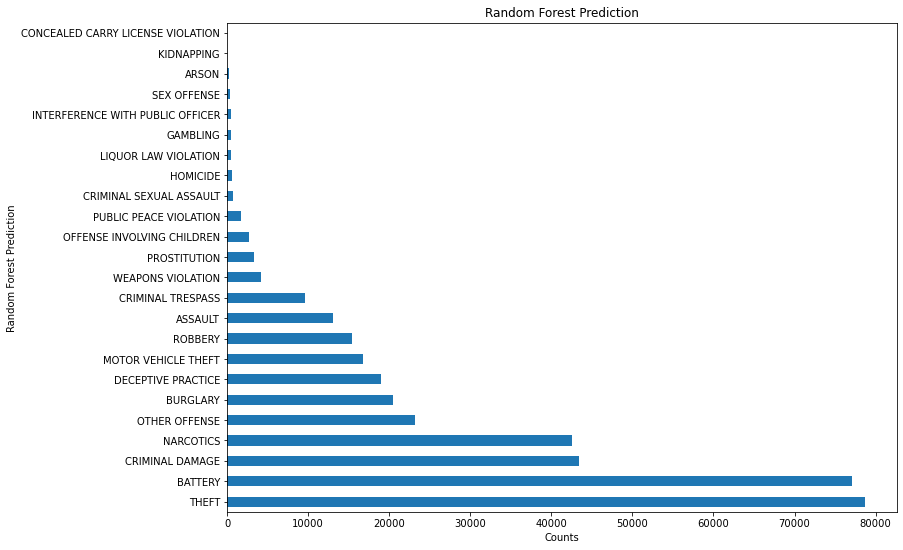

In [208]:
predictBarCount = predictBar["Random Forest Prediction"].value_counts()
fig = plt.figure(figsize=(12,9))
plt.title("Random Forest Prediction")
plt.xlabel("Counts")
plt.ylabel("Random Forest Prediction") 
graph = predictBarCount.plot(kind="barh")

In [214]:
# Testing Acurracy score
from sklearn.metrics import accuracy_score 

ypredic = knnmodel.predict(X_test)  
training_Accuracy = accuracy_score(Y_test,ypredic)
print(round((training_Accuracy*100),2),'%')

87.8 %


In [215]:
# Using Y_test unique values to create labels for the confusion matrix

predictL = Y_test['Primary Type'].unique().tolist()


In [226]:
# CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix 

cf_matrix = confusion_matrix(Y_test,ypredic)

# predLabel =(Y_train.unique())
cfDf = pd.DataFrame(cf_matrix , columns=predictL ,index=predictL)
cfDf

,THEFT,NARCOTICS,BATTERY,PROSTITUTION,OTHER OFFENSE,BURGLARY,CRIMINAL SEXUAL ASSAULT,MOTOR VEHICLE THEFT,CRIMINAL DAMAGE,ASSAULT,...,KIDNAPPING,ARSON,CONCEALED CARRY LICENSE VIOLATION,INTIMIDATION,OBSCENITY,STALKING,PUBLIC INDECENCY,NON-CRIMINAL,OTHER NARCOTIC VIOLATION,HUMAN TRAFFICKING
THEFT,366,5,37,4,0,3,3,2,29,4,...,0,4,1,0,1,27,4,0,23,47
NARCOTICS,11,10174,13346,20,4,48,14,57,133,5,...,0,79,6,0,11,54,8,0,120,32
BATTERY,12,9580,57213,71,8,135,30,56,248,12,...,0,141,14,1,47,122,32,0,240,51
PROSTITUTION,5,27,48,20071,0,89,1,31,27,2,...,0,19,0,0,0,17,0,0,160,24
OTHER OFFENSE,0,3,7,0,22,1,1,0,1,0,...,0,7,0,0,1,1,0,0,0,1
BURGLARY,11,63,192,75,0,42246,20,64,142,2,...,0,39,1,0,15,32,9,0,334,8
CRIMINAL SEXUAL ASSAULT,3,68,124,3,0,27,969,12,101,4,...,0,84,0,0,14,55,5,0,14,12
MOTOR VEHICLE THEFT,2,20,28,34,1,747,1,9078,47,0,...,0,48,1,0,1,17,1,0,259,17
CRIMINAL DAMAGE,15,137,223,31,1,106,44,87,13863,19,...,0,214,13,1,58,147,61,1,181,36
ASSAULT,1,12,22,0,1,6,1,1,14,547,...,0,21,2,0,0,24,4,0,3,11


In [220]:
cfDf.shape

(31, 31)